<a href="https://colab.research.google.com/github/sangamithraD/Data_Analysis_EDA_AIML/blob/main/Data_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

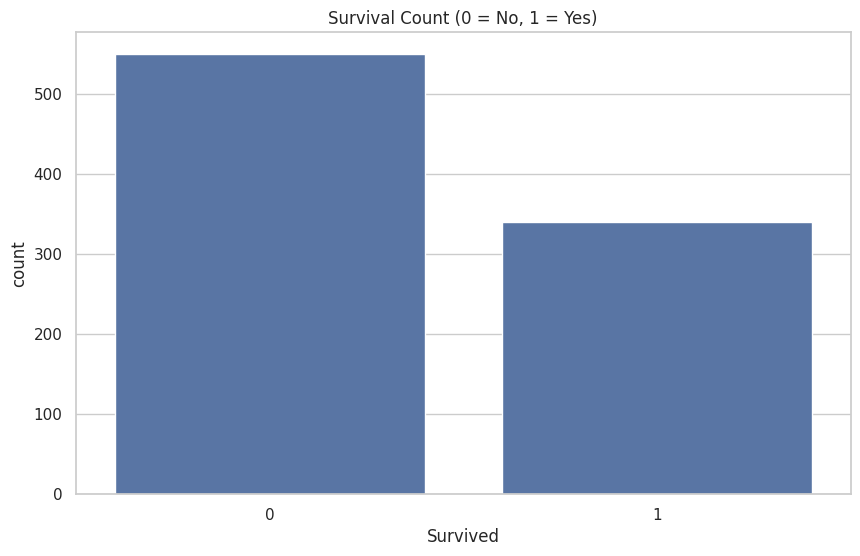

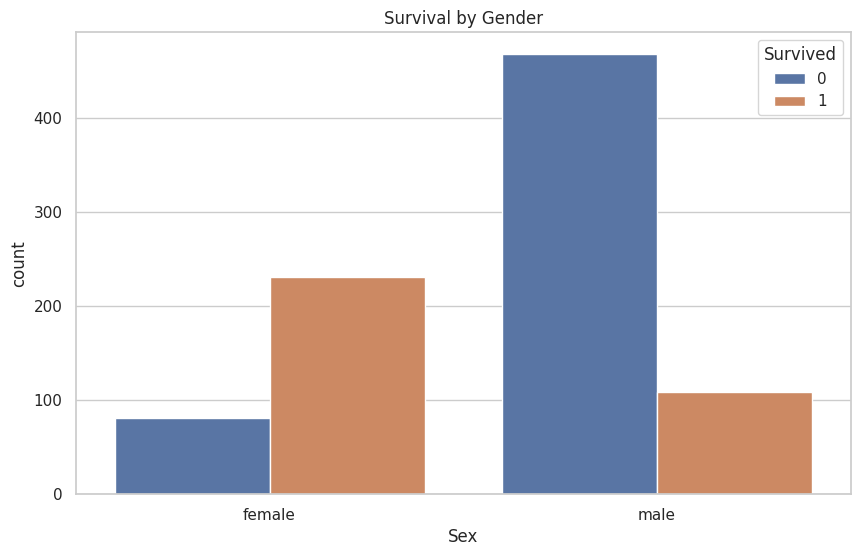

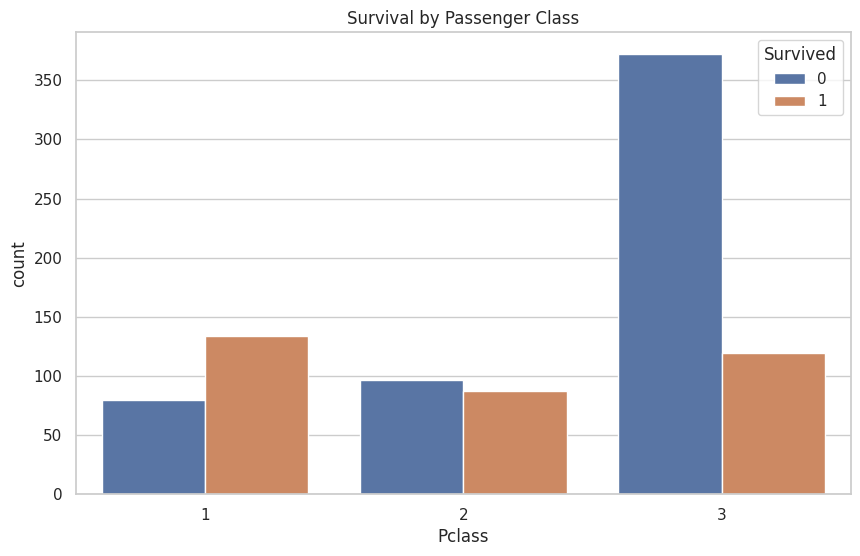

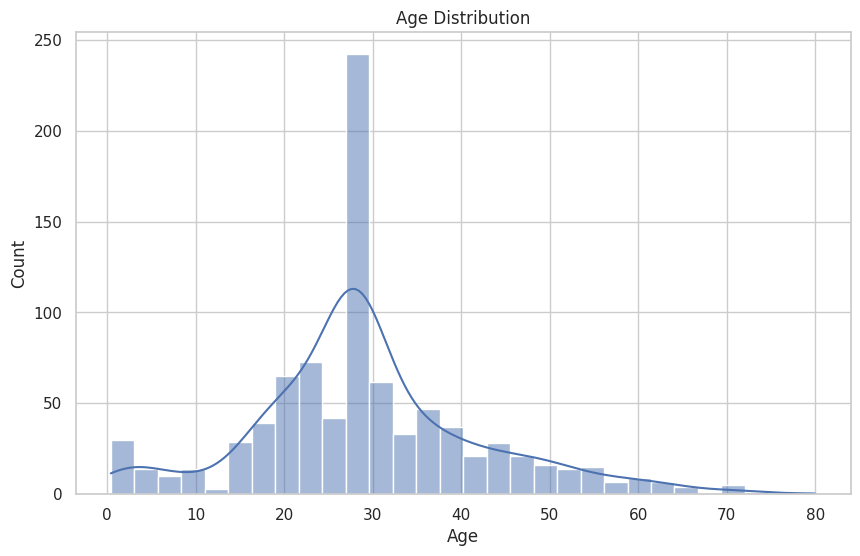

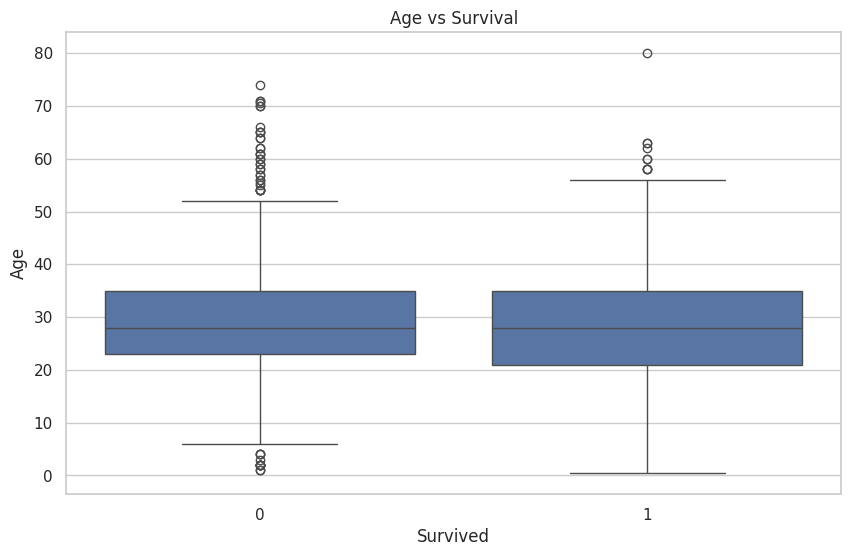

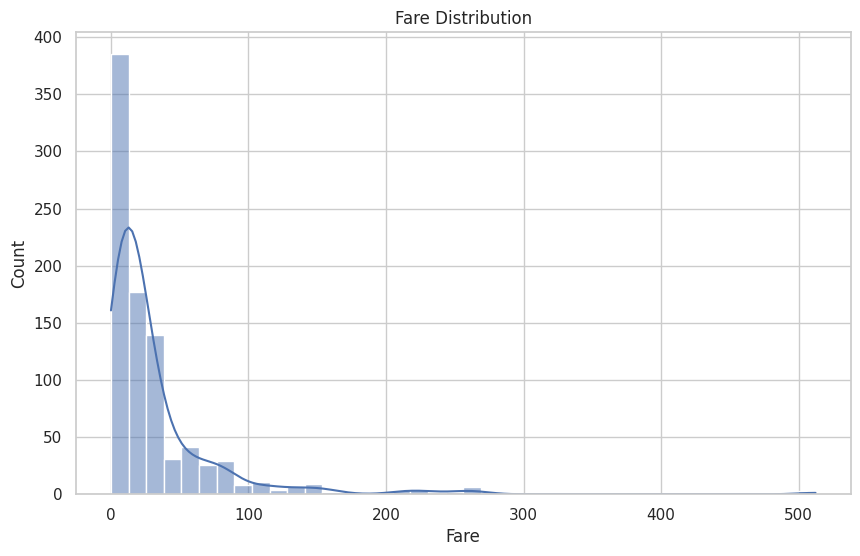

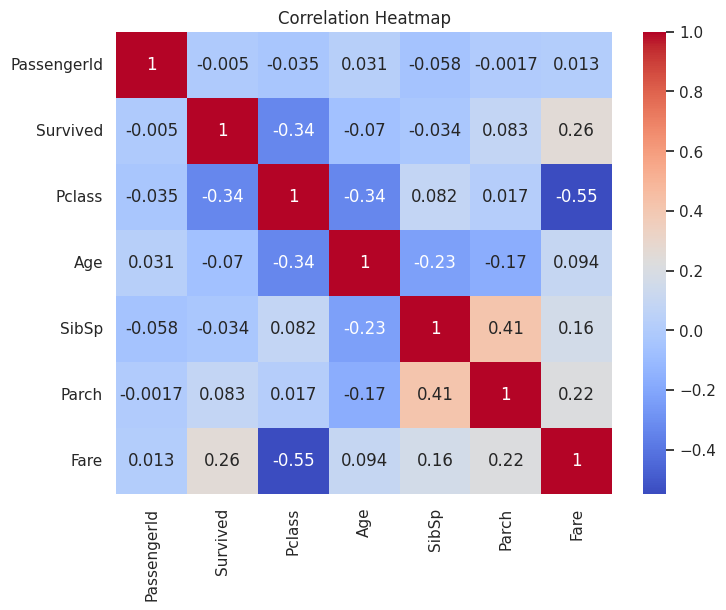

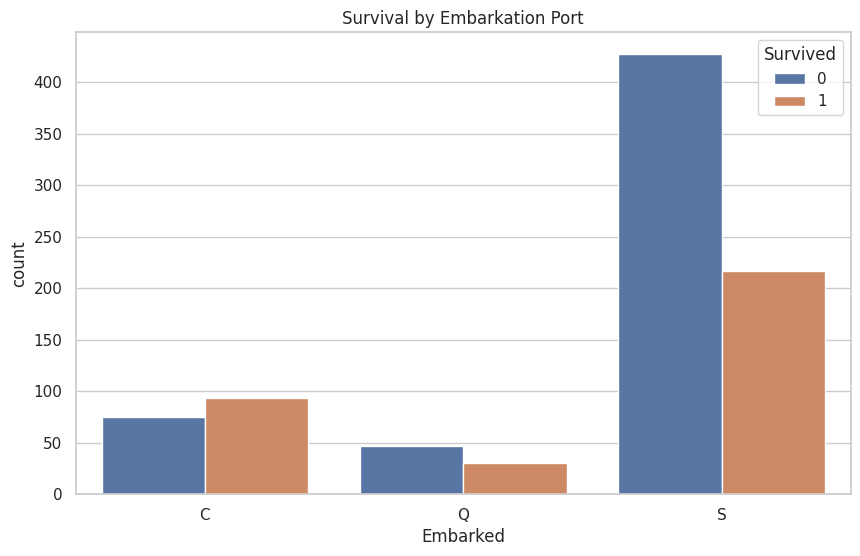


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 71.4+ KB
None


In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load dataset
df = pd.read_csv("train.csv")

# 3. Preview dataset
print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# 4. Data cleaning
# Drop 'Cabin' column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

# Fill missing 'Age' values with median (fix for pandas warning by assignment)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert 'Sex' and 'Embarked' to categorical types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# 5. Exploratory Data Analysis (EDA)

# Plot survival counts
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution histogram
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Fare distribution histogram
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title("Fare Distribution")
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Survival by Embarked port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()

# 6. Print cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())